# <u>Projet de Régression Linéaire Multiple<u>

## 1. <u>Régression Polynomiale<u>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1.1 <u>Dataset<u>

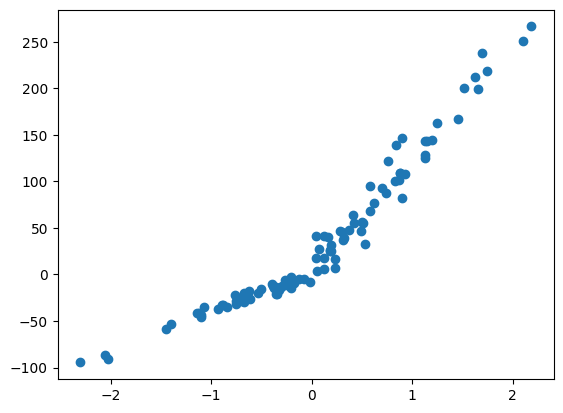

In [2]:
#Création d'un dataset avec des coordonées x (abscisse) et y (ordonnée).
#L'allure linéaire est générée par la fonction make_regression.

np.random.seed(1)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y)/2
y = y.reshape(y.shape[0], 1)
plt.scatter(x, y)

In [3]:
# Création de la matrice X à partir de x 
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))

In [4]:
# Initialisation de la matrice theta
np.random.seed(1)
theta = np.random.randn(3, 1)
theta

array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175]])

### 1.2 <u>Création du Modèle

In [5]:
# Création de notre modèle
def model(X, theta):
    return X.dot(theta)

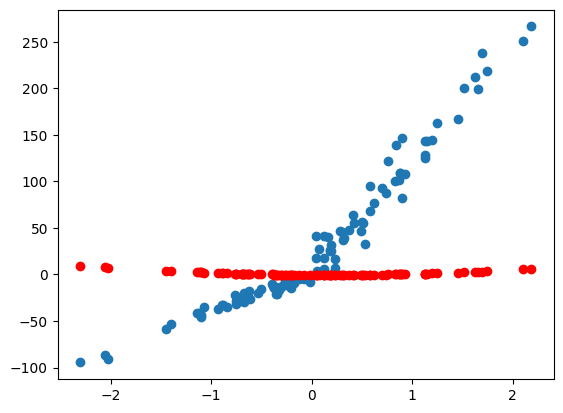

In [6]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='r')

### 1.3 <u>Fonction Coût

In [7]:
# Création de la fonction coût
def cost_function(X, y, theta):
    m = len(y)
    return (np.sum((model(X, theta) - y)**2))/(2*m)

In [8]:
cost_function(X, y, theta)

3754.0479785168613

### 1.4 <u>Descente de Gradient

In [9]:
# Calcul du gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [10]:
#Calcul de la descente de gradient
def gradient_descent(X, y, theta, alpha, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha * grad(X, y, theta)
        #Fonction cout à l'itération i
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

### 1.5 <u>Entraînement du modèle

In [11]:
alpha = 1e-3
n_iterations = 10000

#Phase d'entraînement des paramètres
theta_final, cost_history = gradient_descent(X, y, theta, alpha, n_iterations)
theta_final

array([[18.20130062],
       [83.0780241 ],
       [16.70167317]])

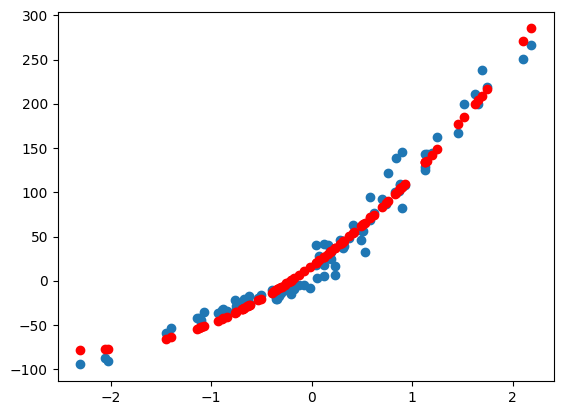

In [12]:
#Insertion dans le modèle et visualisation
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

### 1.6 <u>Courbe d'apprentissage

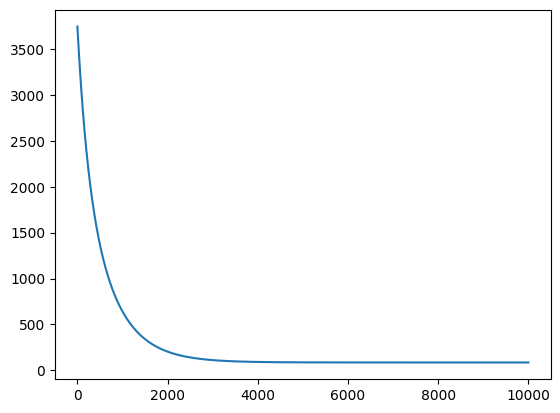

In [13]:
#Affichage de la fonction coût
plt.plot(range(10000), cost_history)

### 1.7 <u>Coefficient de détermination

In [14]:
#Calcul du Coefficient de Détermination
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [15]:
coef_determination (y, predictions)

0.9727571588016458

## 2. <u>Régression linéaire à plusieurs variables

### 2.1 <u>Dataset

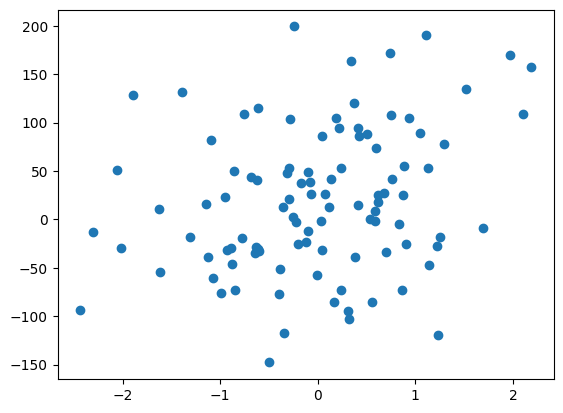

In [16]:
#Création d'un dataset avec des coordonées x (abscisse) et y (ordonnée).
#L'allure linéaire est générée par la fonction make_regression.

np.random.seed(1)
x, y = make_regression(n_samples=100, n_features=2, noise=10)
y = y.reshape(y.shape[0], 1)
plt.scatter(x[:,0], y)

In [17]:
X = np.hstack((x, np.ones((x.shape[0], 1))))

In [18]:
np.random.seed(1)
theta = np.random.randn(3, 1)
theta

array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175]])

### 2.2 <u>Entraînement du modèle

In [19]:
alpha = 1e-3
n_iterations = 10000

#Phase d'entraînement des paramètres
theta_final, cost_history = gradient_descent(X, y, theta, alpha, n_iterations)
theta_final

array([[31.25201374],
       [83.53902424],
       [ 0.80902489]])

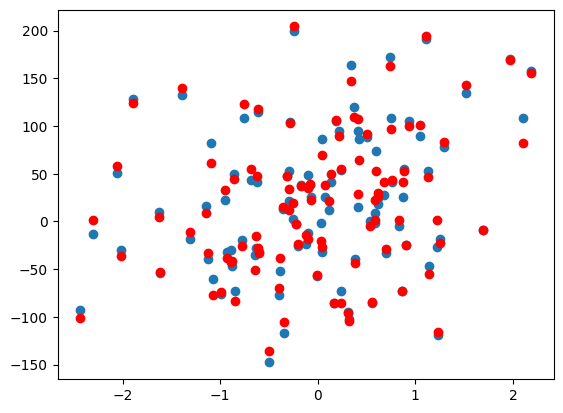

In [20]:
#Insertion dans le modèle et visualisation
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

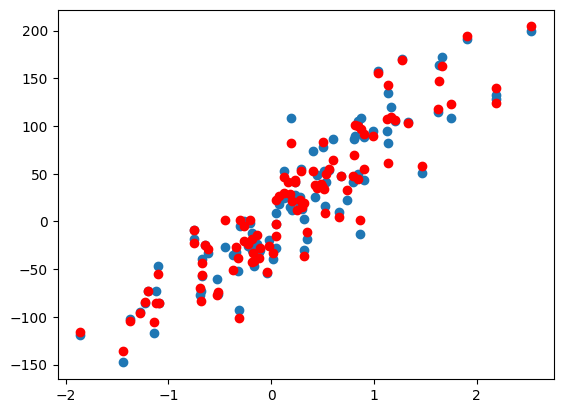

In [21]:
#Insertion dans le modèle et visualisation
predictions = model(X, theta_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

### 2.3 <u>Courbe d'apprentissage

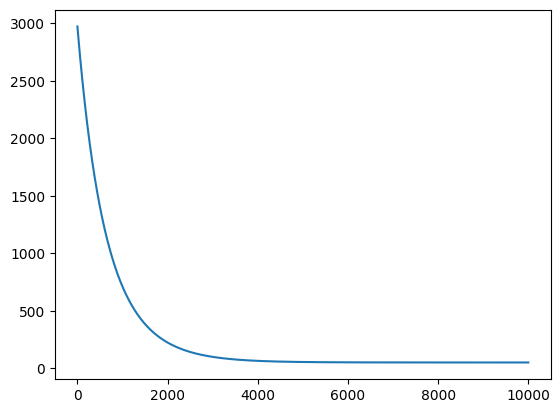

In [22]:
#Affichage de la fonction coût
plt.plot(range(10000), cost_history)

### 2.4 <u>Coefficient de détermination

In [23]:
coef_determination (y, predictions)

0.9818217900867797

### 2.5 <u>Visualisation 3D

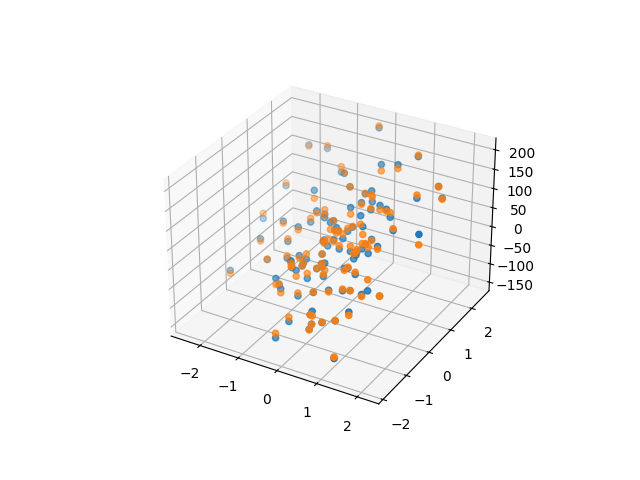

In [24]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)